In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('ANN_Quiz_Data_Breast_Cancer.csv')

In [41]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [42]:
df.shape

(569, 31)

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [44]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

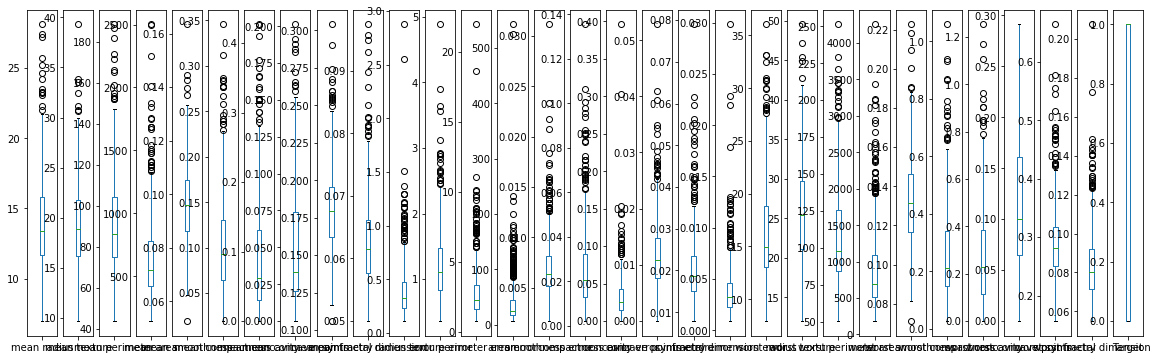

In [45]:
df.plot(kind='box', subplots=True, figsize=(20,6));
plt.tight_layout()

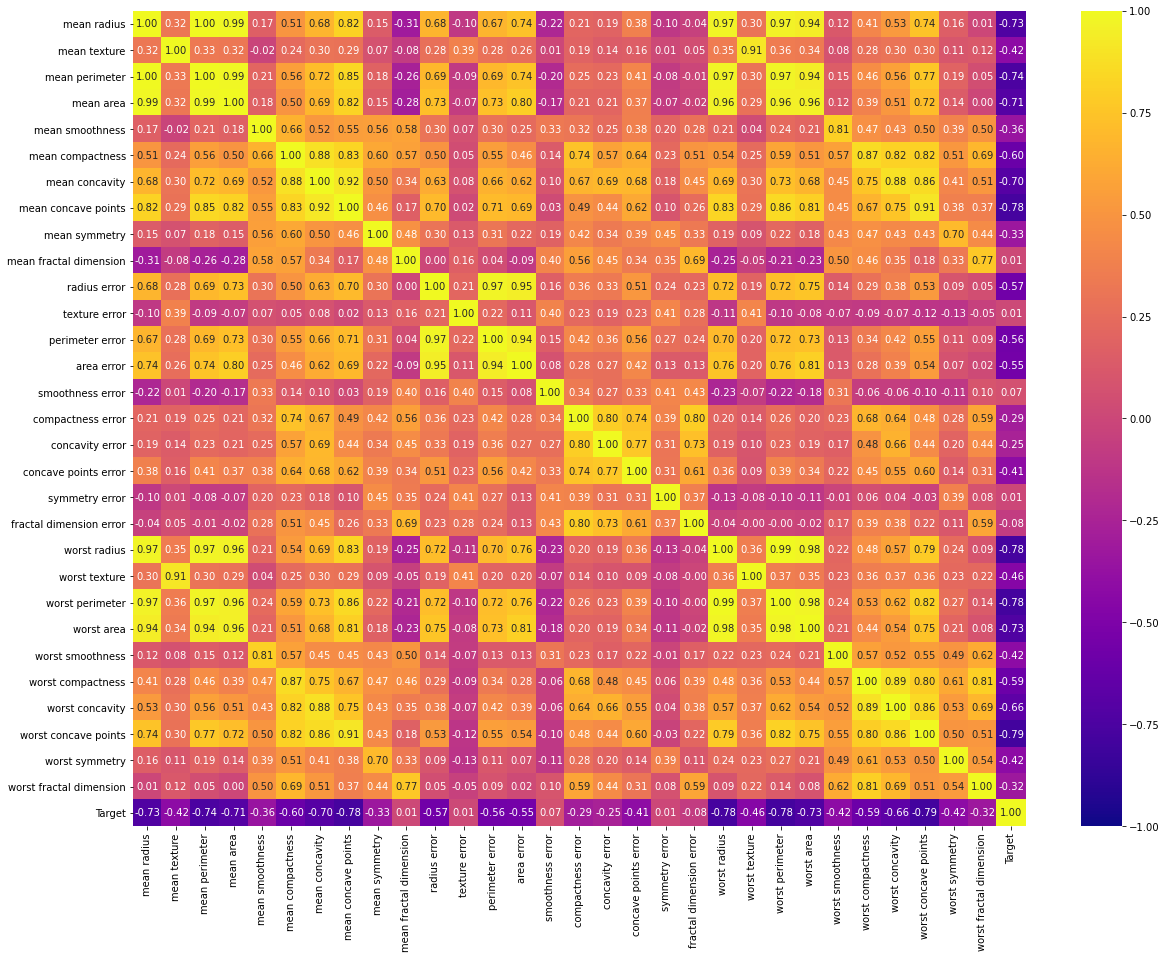

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax=1, cmap='plasma', fmt = '.2f')
plt.show()

In [47]:
y = df.Target
x = df.drop(['Target'], axis=1)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size= 0.20, 
                                                    random_state=0)

In [49]:
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (455, 30)
x_test:  (114, 30)
y_train:  (455,)
y_test:  (114,)


In [50]:
from sklearn.preprocessing import StandardScaler

#Initialize an object for StandardScaler
# sc = StandardScaler()

In [51]:
#Scale the training data
# x_train = sc.fit_transform(x_train)

In [52]:
# Apply the transformation on the test data
# x_test = sc.transform(x_test)

In [53]:
clf = MLPClassifier(hidden_layer_sizes=500, 
                    activation='relu',
                    random_state=0,
                    tol=0.0001)

In [54]:
# Fit the model on the training data
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=500, random_state=0)

In [55]:
# use the model to predict the training data
y_pred_train = clf.predict(x_train)

In [56]:
def eval_model(model,x,y,preds):
    print(f'Accuracy: {accuracy_score(y,preds)}')
    print(f'Recall: {recall_score(y,preds)}')
    plot_confusion_matrix(model,x,y)
    plt.show();
    plot_roc_curve(model,x,y)
    plt.show();
    print(classification_report(y,preds))

Accuracy: 0.9274725274725275
Recall: 0.9896551724137931


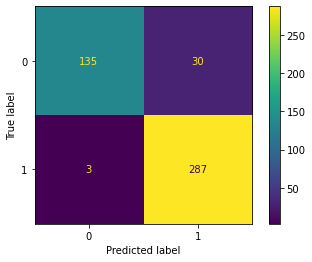

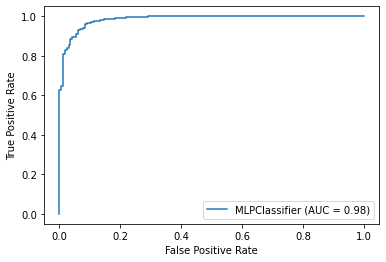

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       165
           1       0.91      0.99      0.95       290

    accuracy                           0.93       455
   macro avg       0.94      0.90      0.92       455
weighted avg       0.93      0.93      0.93       455



In [57]:
eval_model(clf,x_train,y_train,y_pred_train)

In [58]:
# Predicting Test Data and comparing model performance
y_pred_test = clf.predict(x_test)

Accuracy: 0.9298245614035088
Recall: 1.0


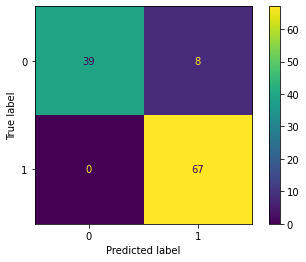

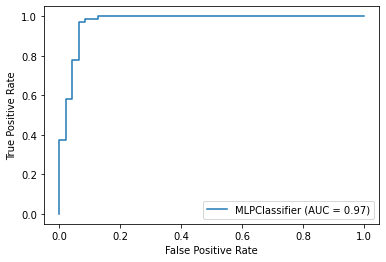

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        47
           1       0.89      1.00      0.94        67

    accuracy                           0.93       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.93      0.93       114



In [59]:
eval_model(clf,x_test,y_test,y_pred_test)

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [100,200,300,500], #[100,(100,200,150)]
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],#0.001,0.0001
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 5) #scoring

In [61]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [100, 200, 300, 500],
                         'max_iter': [5000, 2500, 7000, 6000],
                         'solver': ['sgd', 'adam'], 'tol': [0.01]})

In [62]:
grid_search.best_params_

{'hidden_layer_sizes': 300, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [63]:
best_grid = grid_search.best_estimator_

In [64]:
best_grid

MLPClassifier(hidden_layer_sizes=300, max_iter=5000, random_state=1, tol=0.01)

In [65]:
# Prediction & Evaluation on Train Data
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

Accuracy: 0.9208791208791208
Recall: 0.9862068965517241


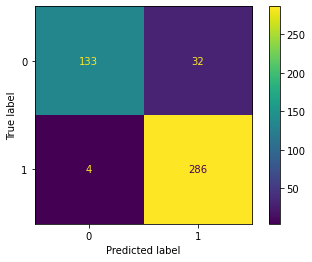

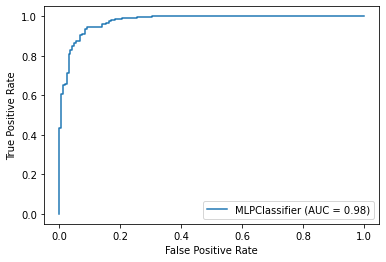

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       165
           1       0.90      0.99      0.94       290

    accuracy                           0.92       455
   macro avg       0.94      0.90      0.91       455
weighted avg       0.93      0.92      0.92       455



In [66]:
eval_model(best_grid,x_train,y_train,ytrain_predict)

Accuracy: 0.9385964912280702
Recall: 1.0


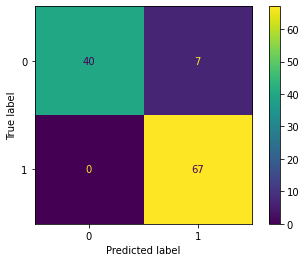

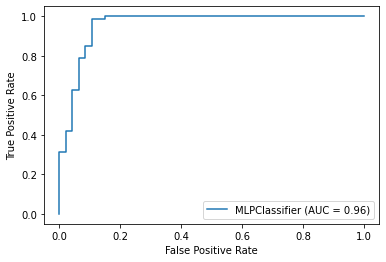

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        47
           1       0.91      1.00      0.95        67

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [67]:
# Prediction & Evaluation on Test Data
eval_model(best_grid,x_test,y_test,ytest_predict)